# ДЗ №7 Binary Classification

Добавлено: 18.09.2021 14:37
Сдать до 17 января 2022 17:00

* Разбейте датасет на 75% тренировочных и 25% тестовых данных. 
* Проведите анализ признаков. 
* Какие признаки можно исключить? 
* Сколько пустых значений? 
* Постройте графики для лучшего понимания признаков. 
* Используйте логистическую регрессию для решения задачи бинарной классификации. 
* Постройте матрицу корреляций, что можно по ней сказать?
* Постройте отчёт по метрикам классификации, что видно из этого отчёта?
* Попробуйте поменять параметры Логистической регрессии. Что это даёт?

Опционально:
* Сделайте кросс-валидацию (K-Fold)
* Проверьте свои результаты в соревновании с тем же датасетом. Сделайте хотябы 3 попытки получить наибольшую метрику.

https://www.kaggle.com/c/titanic
titanic.csv

# Import section

In [1]:
# Base library
import numpy as np                                        # Linear algebra
import pandas as pd                                       # Data processing

# Visualization library
import matplotlib.pyplot as plt                           # Plotting library 
import seaborn as sns                                     # Data visualization

# Displays output inline
%matplotlib inline                                        

In [2]:
# Machine learning library
from sklearn.linear_model import LogisticRegression       # Class implements regularized logistic regression

from sklearn.model_selection import train_test_split      # Split arrays
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Data section

<h3 align='center'>RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, resulted in the deaths of more than 1,500 people.</h3>
<img src='titanic.jpg'  width=800 height=640 ></img>

Titanic dataset - Attribute Information:

* PassengerId - Порядковый номер
* Survived - Выжившие (0 = No; 1 = Yes)
* Pclass - Пассажирский класс (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - Имя и обращение
* Sex - Пол
* Age - Возраст
* SibSp - Количество братьев и сестер/супругов на борту
* Parch - Количество родителей/детей на борту
* Ticket - Номер билета
* Fare - Пассажирский тариф (британский фунт)
* Cabin - Каюта
* Embarked - Порт высадки (C = Cherbourg; Q = Queenstown; S = Southampton)


References:

Hind, Philip. Encyclopedia Titanica.


Details:

http://www.encyclopedia-titanica.org/
http://biostat.mc.vanderbilt.edu

## Load the data

Есть несколько датасетов с информаций о погибших на Титанике:

* Датасет titanic3 на 1309 строк и 14 столбцов.
* Датасет с https://www.kaggle.com/c/titanic содержит для обучающего набора 891 строк/12 столбцов -train.csv, и 418 строк/11 столбцов -test.csv для тестового набора (без целевой переменной), основан на дата сете titanic3.
* Так же есть датасет с дополнительно включенными данными об экипаже.

Ни один из датасетов не является полным. На борту Титаника было по официальным данным было - 2208 пассажиров, из них погибло по разным оценкам 1490 - 1635 человек.

В данной работе используется датасет с kaggle на 891 строк/12 столбцов.

In [3]:
# Read titanic.csv file as a DataFrame called titanic.
titanic = pd.read_csv("titanic.csv")

## Exploratory data analysis and visualization

In [4]:
# Preview the data
# Title DataFrame titanic (return the first `n` rows)
titanic.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Tail DataFrame titanic (return the last `n` rows)
titanic.tail(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Print a concise summary of a DataFrame.
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# Column names
print(f"Column names: \n{titanic.columns}")

Column names: 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
# Data dimensionality
print(f"Shape: \n{titanic.shape}")

Shape: 
(891, 12)


Структура набора данных:

* общее количество колонок - 12
* количество сэмплов/строк – 891

In [9]:
# Data types for each attribute
print(f"Data types: \n{titanic.dtypes}")

Data types: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [10]:
# Generate descriptive statistics.
# Краткая статистика.
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Detect missing values.
print(f"Missing values by attribute: \n{titanic.isnull().sum()}")

Missing values by attribute: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Пропущенные значения:

1. Age - 177 (19.85%)
2. Cabin - 687 (77.10%)
3. Embarked - 2 (0.22%)

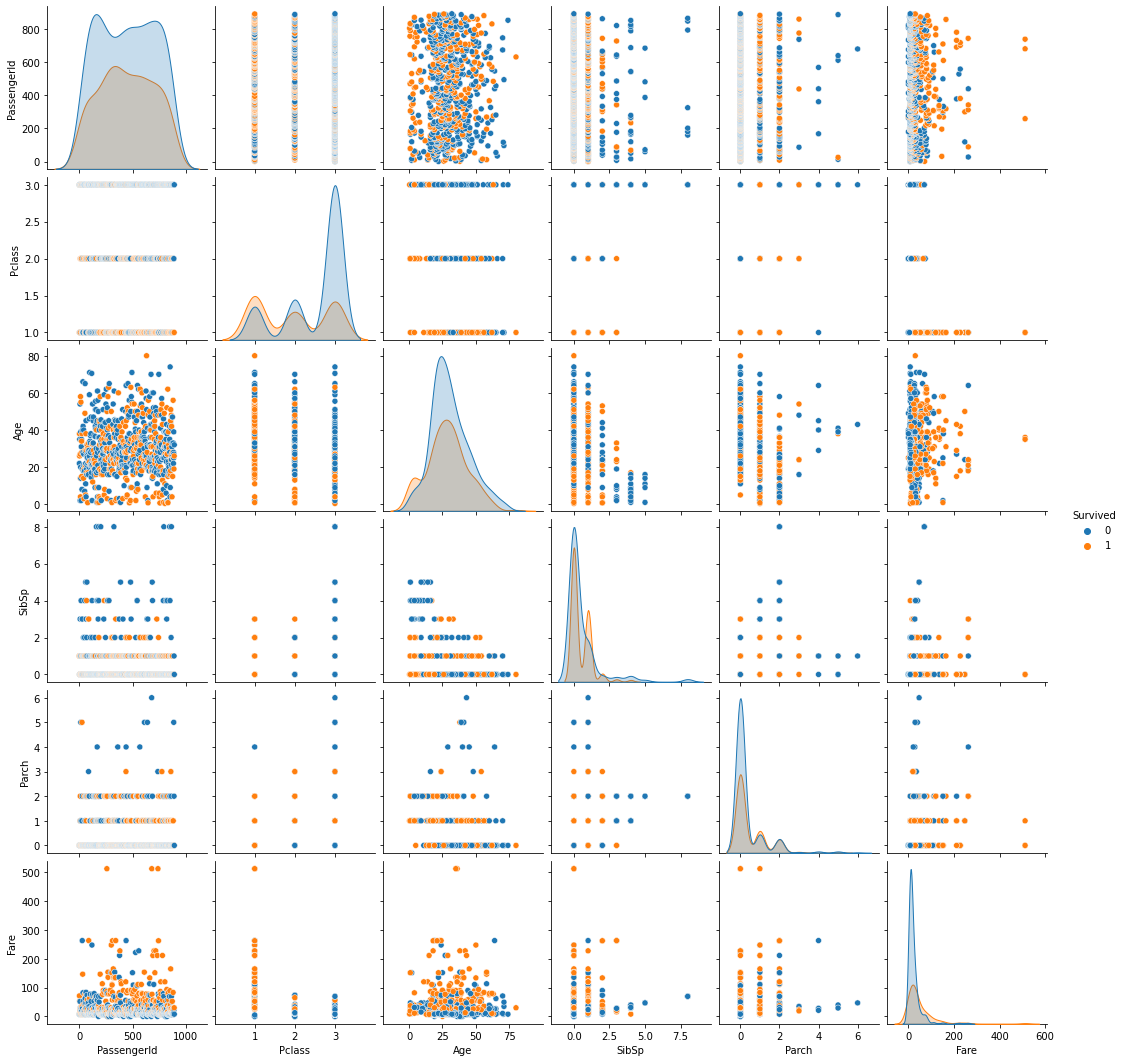

In [12]:
# Dataframe visualization
# Построим -pairplot для лучшего понимания структуры и взаимосвязи данных. 

# Plot pairwise relationships in a dataset.
sns.pairplot(data=titanic, hue='Survived');

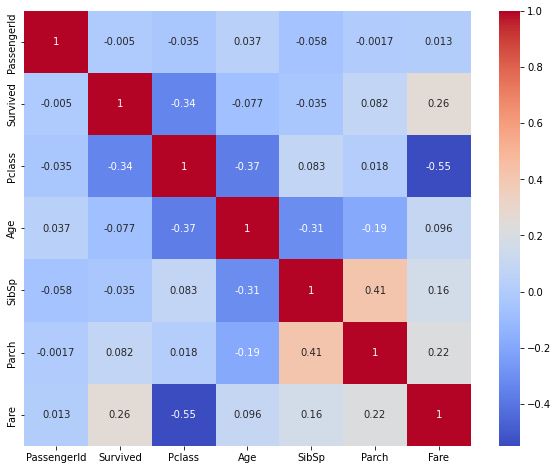

In [13]:
# Построим матрицу корреляции между признаками на исходных данных (без обработки)
plt.figure(figsize=(10,8))
sns.heatmap(titanic.corr(),annot=True, cmap="coolwarm");

Для Survived большая зависимость Survived -> Pclass -0.34 and Fare 0.26. Относительно слабая зависимость от Age (-0.077). 

В свою очередь Pclass зависит Pclass -> Age -0.37 and Fare -0.55 (переменные Pclass / Fare / Age взаимосвязаны между собой, чем дороже билет, тем престижней класс)

In [14]:
# Рассмотрим целевую/target переменную - 'Survived'.

# Для проверки численности/балансировки классов используем функции:
#    value_counts() - для числового представления, 
#    countplot()    - для графического представления.

In [15]:
# Distribution of data by class, text
print(titanic["Survived"].value_counts())

0    549
1    342
Name: Survived, dtype: int64


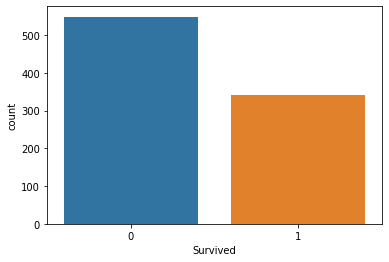

In [16]:
# Distribution of data by class, graphic
sns.countplot(x="Survived", data=titanic);

Целевая переменная - 'Survived' содержит два класса: 0 - не выжил (549), 1 - выжил (342) и являются относительно хорошо сбалансированными

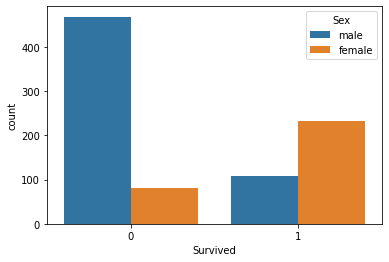

In [17]:
# Рассмотрим зависимость выживших пассажиров по половой принадлежности:
sns.countplot(x="Survived", hue="Sex", data=titanic);

Спаслось больше женщин чем мужчин.

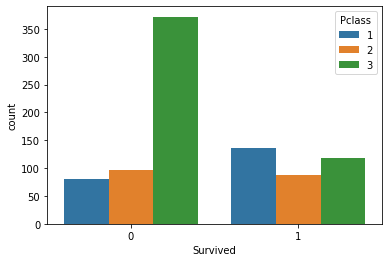

In [18]:
# Рассмотрим зависимость выживших пассажиров по классам:
sns.countplot(x="Survived", hue="Pclass", data=titanic);

В процентном соотношении выживших среди пассажиров первого класса больше. Все помещения и прогулочные палубы лайнера были разделены перегородками по классам (которые во время эвакуации были закрыты замками), a пассажирам одного класса запрещалось проходить на участок другого класса.

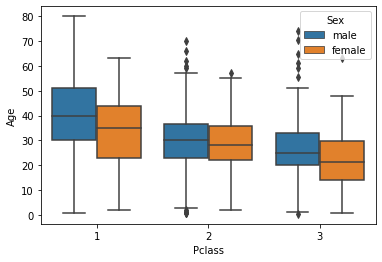

In [19]:
# Рассмотрим распредиление пассажиров по возрасту:
sns.boxplot(x='Pclass',y='Age',data=titanic, hue='Sex');

In [20]:
# Количество различных возрастов:
titanic["Age"].nunique()

88

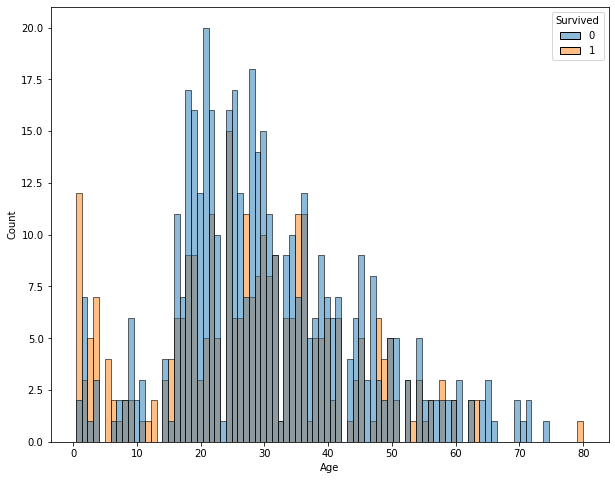

In [21]:
# Рассмотрим распредиление выживших пассажиров по возрасту:
plt.figure(figsize=(10,8))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=88);

# Для данного набора можно посмотреть распредиление по каждому возрасту (используем bins=88), таким образом можно найти дополнительные зависимости, 
# например группа детей до 5 лет имеет очень процент выживших. 

Большой процент выживших детей-пассажиров до 5 лет - родители, которые не могли быть эвакуированы, передавали своих детей прямо на руки пассажирам находившихся уже на спасательных шлюпках. 

Также большой процент выживших пассажиров среди двух категории: 

* возрастом от 27-37 - в основном это женщины
* возрастом от 50-65 - пассажиры 1-го класса (мужчины и женщины), которых эвакуировали в первую очередь.


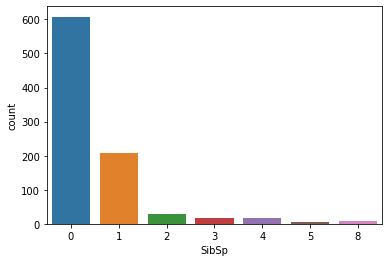

In [22]:
# Рассмотрим распредиление по количеству братьев и сестер/супругов на борту:
sns.countplot(x="SibSp", data=titanic);

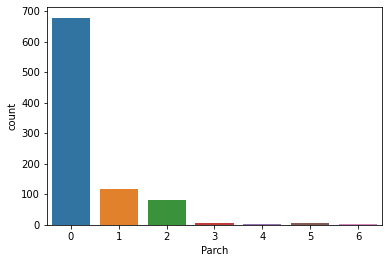

In [23]:
# Рассмотрим распредиление по количеству количество родителей/детей на борту:
sns.countplot(x="Parch", data=titanic);

В основном на борту корабля были мужчины в большей степени (третий класс), ехавшие одни на работу в Америку (Американская мечта). 

In [24]:
# Атрибут PassengerId – внутренний счетчик / индекс строк.
titanic["PassengerId"].nunique()

891

In [25]:
# Атрибут Name – имена и титулы пассажиров.
titanic["Name"].nunique()

891

In [26]:
# Атрибут Ticket – билет на корабль.
titanic["Ticket"].nunique()

681

В атрибутах Name, PassengerId, Ticket большинство уникальных значении (891, 891, 681 соответственно) и не могут участвовать в построении модели.

Note:  
Из Name, при помощи текстовой обработки, можно получить титулы Master, Miss, Mr., Mrs., и с Ticket извлечь какие-то данные, допустим место покупки, отправные и конечные точки, расположение на корабле… В данной работе не используются.

In [27]:
# Рассмотрим атрибут Fare.

# Количество уникальных значении:
titanic["Fare"].nunique()

248

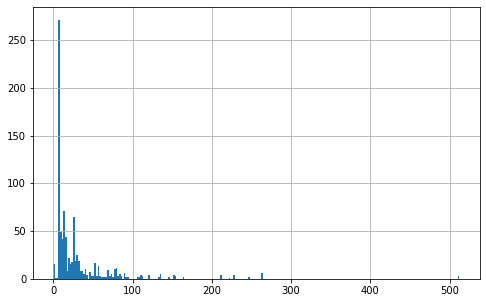

In [28]:
# Distribution:
plt.figure(figsize=(10,8))
titanic["Fare"].hist(bins=248, figsize=(8,5));

In [29]:
# Атрибут Embarked - Порт высадки (C = Cherbourg; Q = Queenstown; S = Southampton)
titanic["Embarked"].nunique()

3

In [30]:
# Distribution Embarked, text
print(titanic["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


## Categorical Features

In [31]:
# Convert categorical variable into dummy/indicator variables
# drop_first=True -> Multicollinearity except
# Для категориальных бинарных значении параметр drop_first=True, иначе drop_first=False

sex = pd.get_dummies(titanic["Sex"], drop_first=True)
embarked = pd.get_dummies(titanic["Embarked"], drop_first=False)
#pclass = pd.get_dummies(titanic["Pclass"], drop_first=False)

In [32]:
# Добавим в дата сет полученные атрибуты.
titanic = pd.concat([titanic, sex, embarked], axis=1)
#titanic = pd.concat([titanic, sex, embarked, pclass], axis=1)

In [33]:
# Текущее состояние дата сета
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0


## Data Cleaning

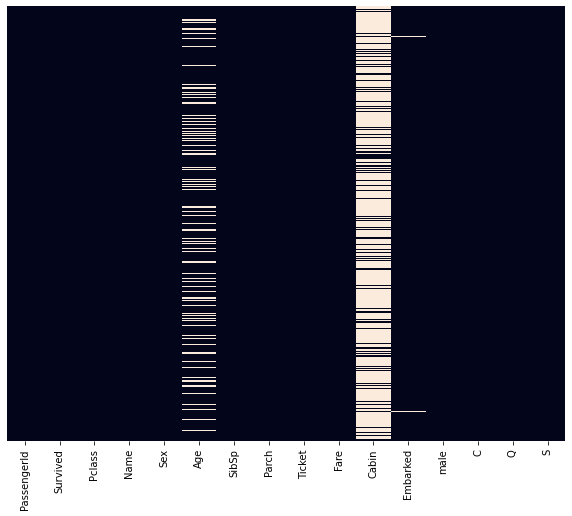

In [34]:
# Рассмотрим распределение пропущенных данных по датасету.
plt.figure(figsize=(10,8))
sns.heatmap(data=titanic.isnull(), yticklabels=False, cbar=False);

Пропущенные значения:

1. Age - 177 (19.85%)
2. Cabin - 687 (77.10%)
3. Embarked - 2 (0.22%)

В Age и Cabin пропущенные данные распределены равномерно по дата сету. 

Для заполнения Age / Возраст можно использовать различные стратегии:

* заполнение средним значением
* заполнение средними значением среди женщин и мужчин
* заполнение средними значением среди женщин и мужчин, с разбивкой по классам (1-2-3), используем данную стратегию. 

In [35]:
# Найдем средние значения возрастов для мужчин и женщин в разных классах
print(titanic["Age"][(titanic["male"] == 0) & (titanic["Pclass"] == 1)].mean())
print(titanic["Age"][(titanic["male"] == 1) & (titanic["Pclass"] == 1)].mean())
print(titanic["Age"][(titanic["male"] == 0) & (titanic["Pclass"] == 2)].mean())
print(titanic["Age"][(titanic["male"] == 1) & (titanic["Pclass"] == 2)].mean())
print(titanic["Age"][(titanic["male"] == 0) & (titanic["Pclass"] == 3)].mean())
print(titanic["Age"][(titanic["male"] == 1) & (titanic["Pclass"] == 3)].mean())

34.61176470588235
41.28138613861386
28.722972972972972
30.74070707070707
21.75
26.507588932806325


In [36]:
def fill_age(cols):
    """A function for filling in missing values in the Age column."""
    
    # Принимаем list() с тремя значениями -Age, -Pclass, -male
    Age  = cols[0]
    Pclass = cols[1]
    male = cols[2]
    
    # Заполняем null_values ранее полученными средними значениями
    if pd.isnull(Age):
        if Pclass == 1 and male == 1:
            return 41
        elif Pclass == 1 and male == 0:
            return 34
        elif Pclass == 2 and male == 1:
            return 30
        elif Pclass == 2 and male == 0:
            return 28
        elif Pclass == 3 and male == 1:
            return 26
        elif Pclass == 3 and male == 0:
            return 21   
    else:
        return Age

In [37]:
# Заполним пропущенные значения в Age, используя функцию fill_age().
titanic["Age"] = titanic[["Age", "Pclass", "male"]].apply(fill_age, axis=1)

In [38]:
# Удалим атрибут Cabin из дата сета, и два пропущенных значения в Embarked
titanic = titanic.drop("Cabin", axis=1)
titanic = titanic.dropna()

In [39]:
# Убедимся что нет пропущенных значении
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
male           0
C              0
Q              0
S              0
dtype: int64

In [40]:
len(titanic)

889

In [41]:
# Удалим атрибуты которые не будут использоваться в построении модели
titanic.drop("Sex", axis=1, inplace=True)
titanic.drop("Embarked", axis=1, inplace=True)
titanic.drop("Name", axis=1, inplace=True)
titanic.drop("Ticket", axis=1, inplace=True)
titanic.drop("PassengerId", axis=1, inplace=True)
#titanic.drop(["Pclass"], axis=1, inplace=True)

In [42]:
# Текущее состояние дата сета
titanic.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0


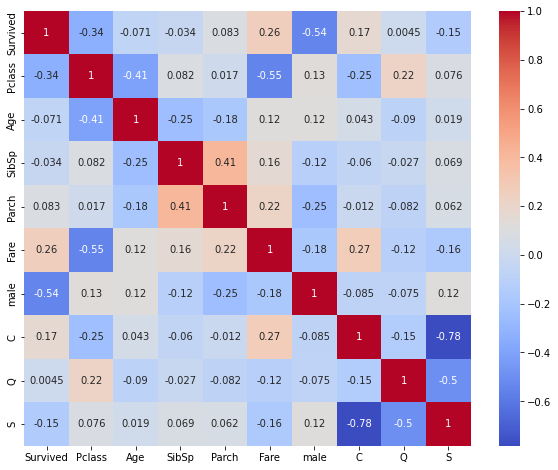

In [43]:
# Построим матрицу корреляции между признаками на обработанных данных:
plt.figure(figsize=(10,8))
sns.heatmap(titanic.corr(),annot=True, cmap="coolwarm");

Для Survived большая зависимость Survived -> Pclass -0.34 / Fare 0.26 / male -0.54 / порт С 0.17 . Относительно слабая зависимость от Age (-0.071).

## Train Test Split

In [44]:
# Разделим данные на тестовые и обучающие:

In [45]:
test_size=0.25     # Размер тестового набора
random_state=101  

In [46]:
# Column names
print(f"Column names: \n{titanic.columns}")

Column names: 
Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'C', 'Q',
       'S'],
      dtype='object')


In [47]:
# inputs / Массив X, содержит признаки для обучения
#X = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'C', 'Q','S']]
X = titanic.drop("Survived", axis=1)

# outputs / Массив у с целевой переменной
y = titanic["Survived"]

In [48]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

In [49]:
# Data dimensionality and class distribution on train set
print(f"Shape X_train: \n{X_train.shape}\n")
print(f"Class distribution y_train: \n{y_train.value_counts()}")

Shape X_train: 
(666, 9)

Class distribution y_train: 
0    413
1    253
Name: Survived, dtype: int64


In [50]:
# Data dimensionality and class distribution on test set
print(f"Shape X_test: \n{X_test.shape}\n")
print(f"Class distribution y_test: \n{y_test.value_counts()}")

Shape X_test: 
(223, 9)

Class distribution y_test: 
0    136
1     87
Name: Survived, dtype: int64


In [51]:
folds = 5

# Returns K-Folds cross-validator
kf = KFold(n_splits=folds, random_state=random_state, shuffle=True)

# Returns stratified folds
# skf = StratifiedKFold(n_splits=folds, random_state=random_state, shuffle=True)

# Logistic Regression model

Logistic regression is named for the function used at the core of the method, the logistic function.

It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$\frac{1}{1 + e^{-x}}$$

$e$ is the base of the natural logarithms and $x$ is value to transform via the logistic function.

The logistic regression equation has a very simiar representation like linear regression. The difference is that the output value being modelled is binary in nature.

$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_1}$$

or

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_1}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_1$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

## Training and Predicting on Base Logistic Regression Model

In [52]:
# Построим базовую модель LogisticRegression()

# Instantiate a classifier and print default parameters
base_log_model = LogisticRegression(C=1, solver='liblinear')
print(f"Default parameters: \n{base_log_model.get_params()}")

Default parameters: 
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [53]:
# Train classifer
base_log_model.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

## Model Performance on Base Logistic Regression Model

In [54]:
# Predict class labels for samples in X
predictions = base_log_model.predict(X_test)

In [55]:
# Accuracy classification score
accuracy_score(y_test, predictions)

0.8295964125560538

In [56]:
# Build confusion matrix in text mode
print(confusion_matrix(y_test, predictions))

[[126  10]
 [ 28  59]]


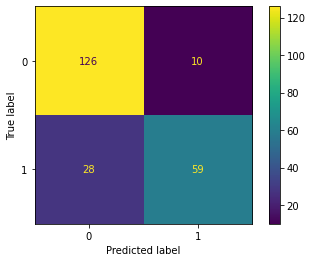

In [57]:
# Build confusion matrix in graphic mode
plot_confusion_matrix(base_log_model, X_test, y_test);

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.68      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



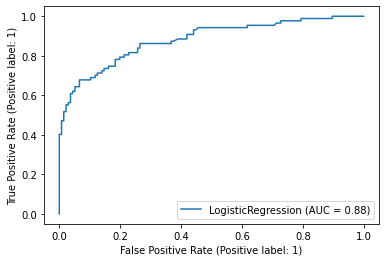

In [59]:
# Compute macro-average ROC curve and ROC area
plot_roc_curve(base_log_model, X_test, y_test);

In [60]:
# Визуализируем зависимость параметров в модели:

# Получим коэффициенты:
coefs = pd.Series(index=X.columns, data=base_log_model.coef_[0])

In [61]:
coefs

Pclass   -0.808813
Age      -0.026469
SibSp    -0.254104
Parch    -0.110958
Fare      0.004007
male     -2.371195
C         1.118784
Q         0.892115
S         0.729020
dtype: float64

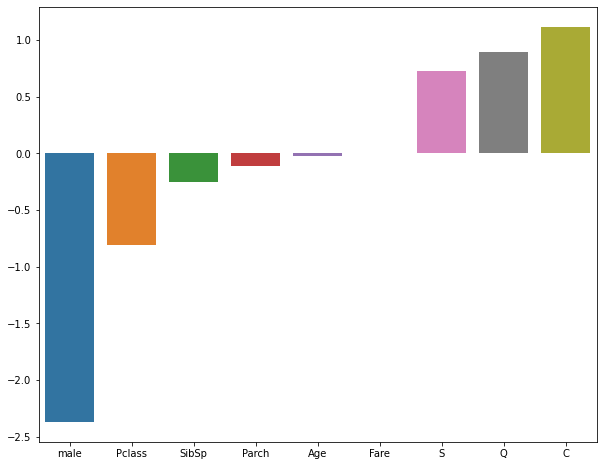

In [62]:
coefs = coefs.sort_values() # Сортировка
plt.figure(figsize=(10,8))
sns.barplot(x=coefs.index, y=coefs.values);

In [63]:
#print('Accuracy on the training subset: {:.3f}'.format(base_log_model.score(X_train, y_train)))
#print('Accuracy on the test subset: {:.3f}'.format(base_log_model.score(X_test, y_test)))

## Training and Predicting on Grid Logistic Regression Model

In [64]:
# Create a list of dictionaries called param_grid and fill out some parameters for C, penalty.
# Для каждого solver свой набор параметров (не все solver поддерживают одни и те же параметры)

C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = [{'solver':['lbfgs'],     'C':C, 'penalty':['l2']},
              {'solver':['saga'],      'C':C, 'penalty':['l1', 'l2']},
              {'solver':['liblinear'], 'C':C, 'penalty':['l1', 'l2']}]

In [65]:
grid_log_model = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                              param_grid=param_grid,
                              refit=True,
                              verbose=1,
                              cv=kf,
                              scoring='accuracy',
                              n_jobs=-1)

# scoring='accuracy' -> Strategy to evaluate the performance of the cross-validated model on the test set.
# n_jobs=-1          -> Number of jobs to run in parallel.

In [66]:
grid_log_model.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l2'], 'solver': ['lbfgs']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2'], 'solver': ['saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             scoring='accuracy', verbose=1)

## Model Performance on Base Grid Logistic Regression Model

In [67]:
# Predict class labels for samples in X
grid_log_y_pred = grid_log_model.predict(X = X_test)

In [68]:
# Accuracy classification score
accuracy_score(y_test, grid_log_y_pred)

0.8385650224215246

In [69]:
print(f"Best parameter values: \n{grid_log_model.best_params_}")

Best parameter values: 
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [70]:
print(f"Best model:  \n{grid_log_model.best_estimator_}")

Best model:  
LogisticRegression(C=1, max_iter=1000)


In [71]:
# Build confusion matrix in text mode
confusion_matrix(y_test, grid_log_y_pred)

array([[127,   9],
       [ 27,  60]], dtype=int64)

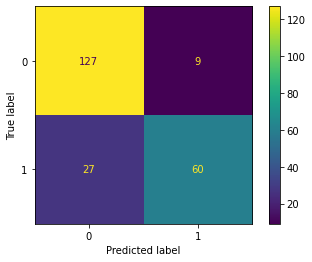

In [72]:
# Build confusion matrix in graphic mode
plot_confusion_matrix(grid_log_model, X_test, y_test);

In [73]:
print(classification_report(y_test, grid_log_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.88       136
           1       0.87      0.69      0.77        87

    accuracy                           0.84       223
   macro avg       0.85      0.81      0.82       223
weighted avg       0.84      0.84      0.83       223



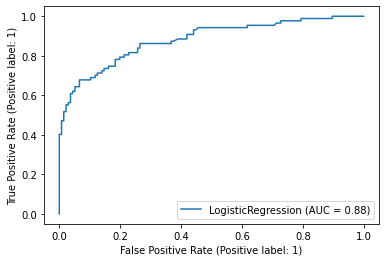

In [74]:
# Compute macro-average ROC curve and ROC area
plot_roc_curve(base_log_model, X_test, y_test);

# Summary.

Note 1: В данной работе использовали модель LogisticRegression для задачи бинарной классификации (dataset titanic). Также применили GridSearch для настройки параметров модели. При помощи подбора гипер параметров при помощи GridSearch получилось улучшить оценку модели. Кросс-валидацию использовали внутри GridSearchCV  (folds = 5), отдельно cross_val_score / cross_validate не использовали. Результаты оценки моделей приведены ниже.

In [75]:
# Результаты accuracy для построенных моделей:

print(f"Accuracy Base Log Model: \n{accuracy_score(y_test, predictions)}")
print(f"Accuracy Grid Log Model: \n{accuracy_score(y_test, grid_log_y_pred)}")

Accuracy Base Log Model: 
0.8295964125560538
Accuracy Grid Log Model: 
0.8385650224215246


Note 2: Самое большое количество выживших: 1 женщины –  2 маленькие дети – 3 пассажиры 1-го класса. 

Самое большое количество погибших, это молодые мужчины 3-го класса и большинство из них вместе с погибшими членами экипажа, при поиске тел хранили в море, а погибших пассажиров 1-го класса доставляли в могри.

На “Карпатии”  спаслись официально все 712 человек, переживших крушение “Титаника”.

По разным оценкам в катастрофе погибло от  1490 – 1635 человек.

Причины крушения:
* Погодные условия и игнорирование ледовых сообщении
* Высокая скорость в опасной зоне
* Уязвимость швов в конструкции корабля
* Ошибки персонала наблюдения
